In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station



In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
columnsm = inspector.get_columns('measurement')
for m in columnsm:
    print(m)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [22]:
columnss = inspector.get_columns('station')
columnss
for s in columnss:
    print(s)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [29]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [62]:
recent_date, = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

2017-08-23


In [91]:
# recent2 = recent_date.replace('-', ', ')
# recent2

# recent3 = print(recent2)

In [92]:
# year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# year_ago

In [44]:
# date = dt.datetime(2016, 8, 23)

# results = session.query()

In [93]:
# results = session.query(Measurement.date, Measurement.prcp).\
#                   filter(Measurement.date > year_ago).all()

In [94]:
# measure_data = [{"Date": result[0], "Precipitation": result[1]} for result in results]
#measure_data

In [95]:
# measure_df = pd.DataFrame(measure_data).set_index("Date")

In [96]:
# measure_df = measure_df.sort_index(ascending= True)

In [97]:
# measure_df.plot( ylabel= "Inches")
# plt.xticks(rotation = 'vertical')

# plt.show()

In [126]:
# Checking the outcome, parsing the recent_date into a date format
yearago = dt.datetime.strptime(recent_date, '%Y-%m-%d')
yearago

datetime.datetime(2017, 8, 23, 0, 0)

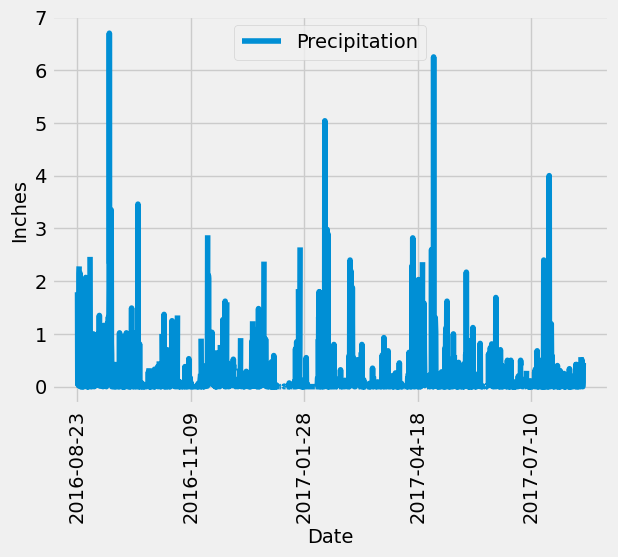

In [130]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date, = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days = 366)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
                  filter(Measurement.date > year_ago).all()
measure_data = [{"Date": result[0], "Precipitation": result[1]} for result in results]
# Save the query results as a Pandas DataFrame. Explicitly set the column names
measure_df = pd.DataFrame(measure_data).set_index("Date")

# Sort the dataframe by date
measure_df = measure_df.sort_index(ascending= True)

# Use Pandas Plotting with Matplotlib to plot the data
measure_df.plot( ylabel= "Inches")
plt.xticks(rotation = 'vertical')

plt.show()

In [131]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [136]:
#Checking the names of Station again.
columnss

for c in columnss:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [137]:
# Checking the names of columns in Measurements again.
columnsm

for c in columnsm:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [113]:
# Design a query to calculate the total number of stations in the dataset
session.query( func.count(Station.station)).all()

[(9,)]

In [118]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results2 = session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).\
                   order_by(func.count(Measurement.station).desc()).all()
results2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [119]:
#Grabing the first of the list
results2[0]

('USC00519281', 2772)

In [135]:
#Only want the first colum of the first.
most_active_id = results2[0][0]

most_active_id

'USC00519281'

In [142]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == most_active_id).all()

most_active

[(54.0, 71.66378066378067, 85.0)]

In [145]:
#Using the most active station id
#Getting the last 12 months of temp data.
results3 = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.station == most_active_id).\
        filter(Measurement.date >= year_ago).all()

In [148]:
#Converting to panda dataframe

temp_df = pd.DataFrame(results3)

#Set station as index
temp_df = temp_df.set_index('station')

temp_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


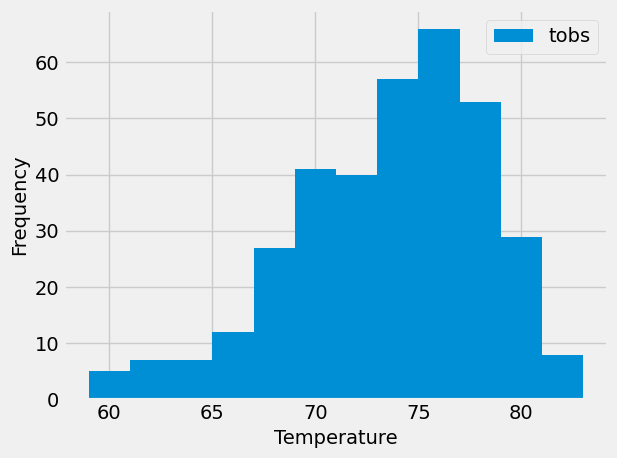

In [163]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_plot = temp_df.plot(kind='hist', bins = 12)
plt.xlabel("Temperature")

plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()